Ejercicio #1:
- 1) Generar una señal con una frecuencia de muestreo muy grande, una combinación lineal de senos o de cosenos (es decir varias frecuencias), de 0 a 1 segundo
- 2) Generar esa misma señal pero con una frecuencia de muestreo menor, de 0 a 1 segundo
- 3) Comparar los FFT de ambas

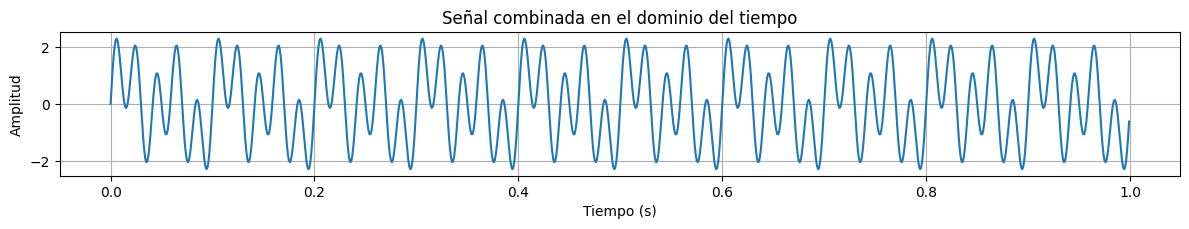

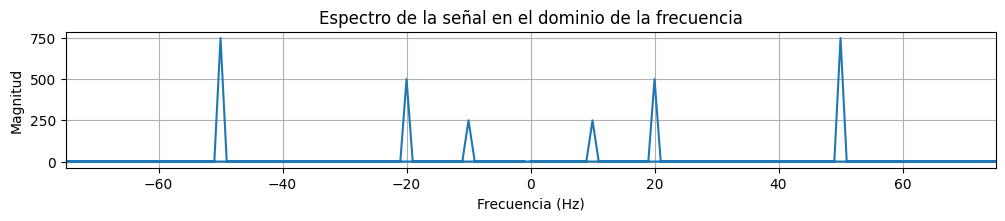

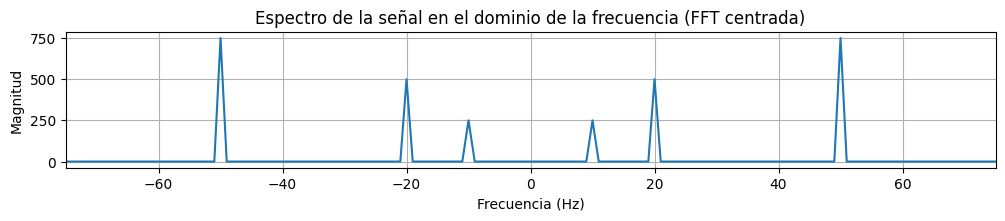

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1    # Duración de la señal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vector de tiempo

# Frecuencias de la señal
frequencies = [10, 20, 50]  # En Hz
amplitudes = [0.5, 1, 1.5]  # Amplitudes respectivas

# Crear la señal como la suma de 3 sinusoides
signal1 = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal1)
plt.title("Señal combinada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()


# FFT de la señal
fft_signal = np.fft.fft(signal1)
magnitude = np.abs(fft_signal)
freqs = np.fft.fftfreq(len(t), 1/fs)  # Frecuencias asociadas

# Centrado del espectro
fft_shifted = np.fft.fftshift(fft_signal)
freqs_shifted = np.fft.fftshift(freqs)
magnitude_shifted = np.abs(fft_shifted)

#Grafica sin fftshift
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 2)
plt.plot(freqs, magnitude)
plt.xlim(-75, 75)
plt.title("Espectro de la señal en el dominio de la frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

# Graficar el espectro en el dominio de la frecuencia (centrado)
graficsignal1 = plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 3)
plt.plot(freqs_shifted, magnitude_shifted)
plt.xlim(-75, 75)
plt.title("Espectro de la señal en el dominio de la frecuencia (FFT centrada)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)


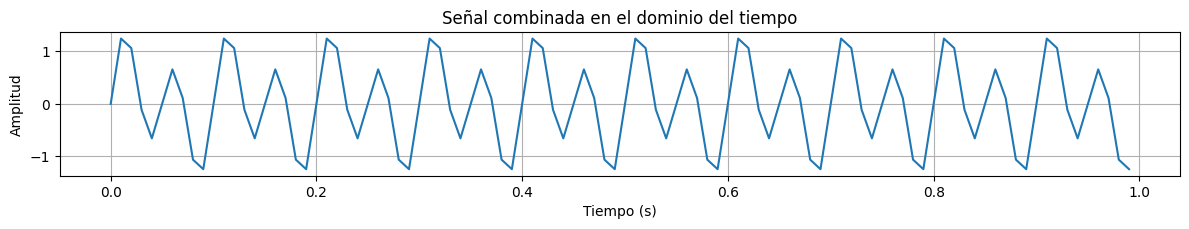

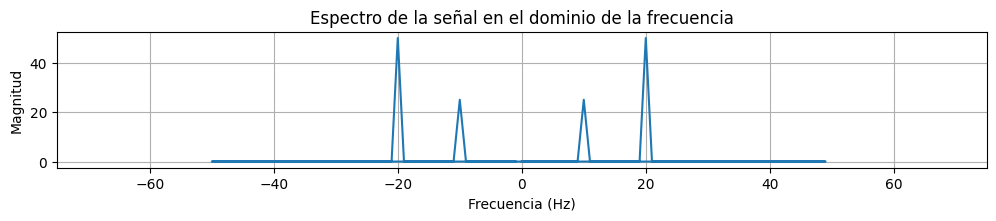

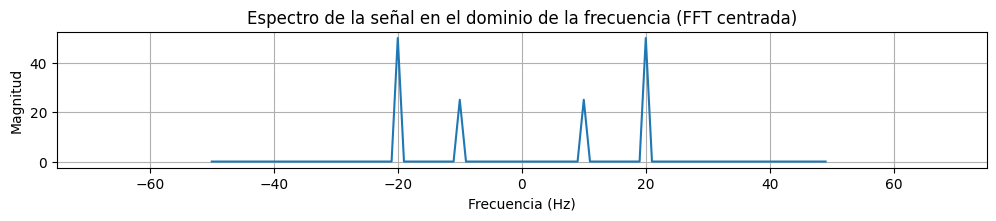

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 100  # Frecuencia de muestreo (Hz)
T = 1    # Duración de la señal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vector de tiempo

# Frecuencias de la señal
frequencies = [10, 20, 50]  # En Hz
amplitudes = [0.5, 1, 1.5]  # Amplitudes respectivas

# Crear la señal como la suma de 3 sinusoides
signal2 = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal2)
plt.title("Señal combinada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()


# FFT de la señal
fft_signal = np.fft.fft(signal2)
magnitude = np.abs(fft_signal)
freqs = np.fft.fftfreq(len(t), 1/fs)  # Frecuencias asociadas

# Centrado del espectro
fft_shifted = np.fft.fftshift(fft_signal)
freqs_shifted = np.fft.fftshift(freqs)
magnitude_shifted = np.abs(fft_shifted)

#Grafica sin fftshift
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 2)
plt.plot(freqs, magnitude)
plt.xlim(-75, 75)
plt.title("Espectro de la señal en el dominio de la frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

# Graficar el espectro en el dominio de la frecuencia (centrado)
graficsignal2 = plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 3)
plt.plot(freqs_shifted, magnitude_shifted)
plt.xlim(-75, 75)
plt.title("Espectro de la señal en el dominio de la frecuencia (FFT centrada)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)


**Comparación entre ambas:**

Espectro de la señal con freuencia de muestreo alta:

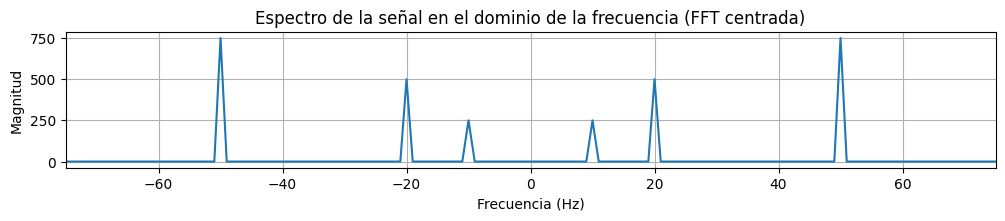

In [3]:
graficsignal1

Espectro de la señal con freuencia de muestreo baja:

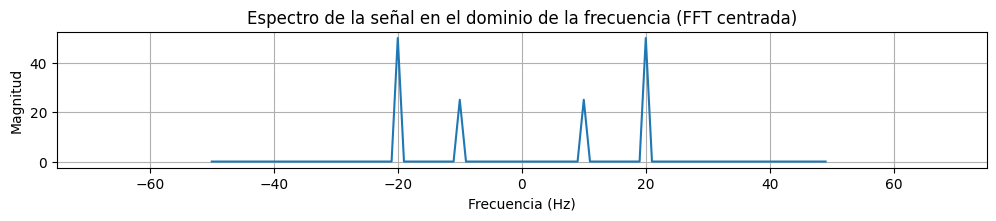

In [4]:
graficsignal2

Ejercicio #2:
- 1) Hacer una señal sinusoidal con 10 frecuencias (10,20,30,...,100Hz), una combinacion lineal de muchos senos
- 2) Agregar ruido blanco gaussiano multiplicado por 0.3
- 3) Sacar FFT de esa señal
- 4) Aplicar IFFT despues para asegurarme que esta bien hecho
- 5) A mi primer omega recortar armonicos de cualquier forma
- 6) Al vector resultante despues de recortar armonicos aplicarle de nuevo IFFT para obtener la señal filtrada

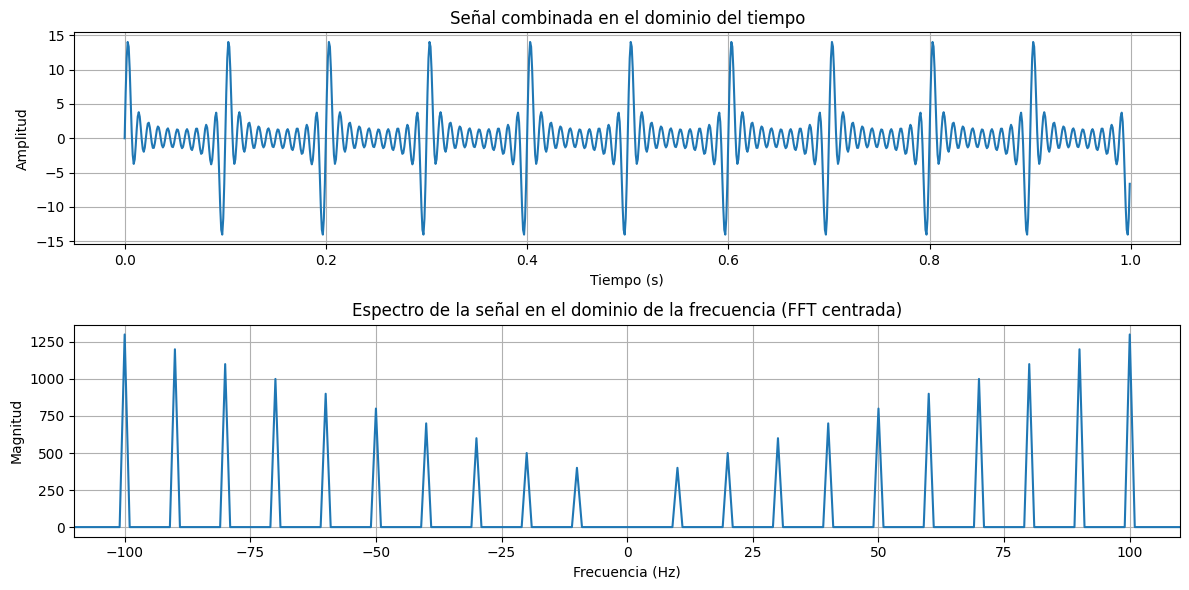

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
T = 1      # Duración de la señal (segundos)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Vector de tiempo

# Frecuencias de la señal
frequencies = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # En Hz
amplitudes = [0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6]  # Amplitudes respectivas

# Crear la señal como la suma de 10 sinusoides
signal = sum(amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies)))

# FFT de la señal
fft_signal = np.fft.fft(signal)
magnitude = np.abs(fft_signal)
freqs = np.fft.fftfreq(len(t), 1/fs)  # Frecuencias asociadas

# Centrado del espectro
fft_shifted = np.fft.fftshift(fft_signal)
freqs_shifted = np.fft.fftshift(freqs)
magnitude_shifted = np.abs(fft_shifted)

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Señal combinada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar el espectro en el dominio de la frecuencia (centrado)
plt.subplot(2, 1, 2)
plt.plot(freqs_shifted, magnitude_shifted)
plt.title("Espectro de la señal en el dominio de la frecuencia (FFT centrada)")
plt.xlim(-110,110)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()


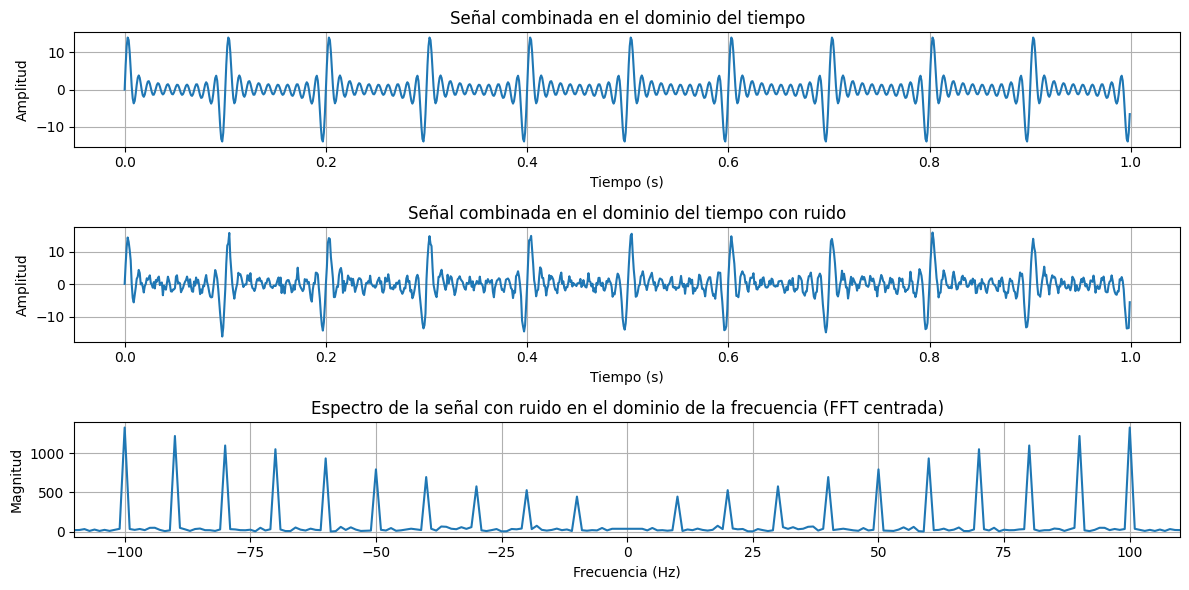

In [6]:
noise = np.random.normal(loc=0, scale=3, size=len(signal))*0.3
signalnoise = signal + noise

# FFT de la señal
fft_signal = np.fft.fft(signalnoise)
magnitude = np.abs(fft_signal)
freqs = np.fft.fftfreq(len(t), 1/fs)  # Frecuencias asociadas

# Centrado del espectro
fft_shifted = np.fft.fftshift(fft_signal)
freqs_shifted = np.fft.fftshift(freqs)
magnitude_shifted = np.abs(fft_shifted)

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title("Señal combinada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar la señal en el dominio del tiempo
plt.subplot(3, 1, 2)
plt.plot(t, signalnoise)
plt.title("Señal combinada en el dominio del tiempo con ruido")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar el espectro en el dominio de la frecuencia (centrado)
plt.subplot(3, 1, 3)
plt.plot(freqs_shifted, magnitude_shifted)
plt.title("Espectro de la señal con ruido en el dominio de la frecuencia (FFT centrada)")
plt.xlim(-110,110)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

plt.tight_layout()
plt.show()


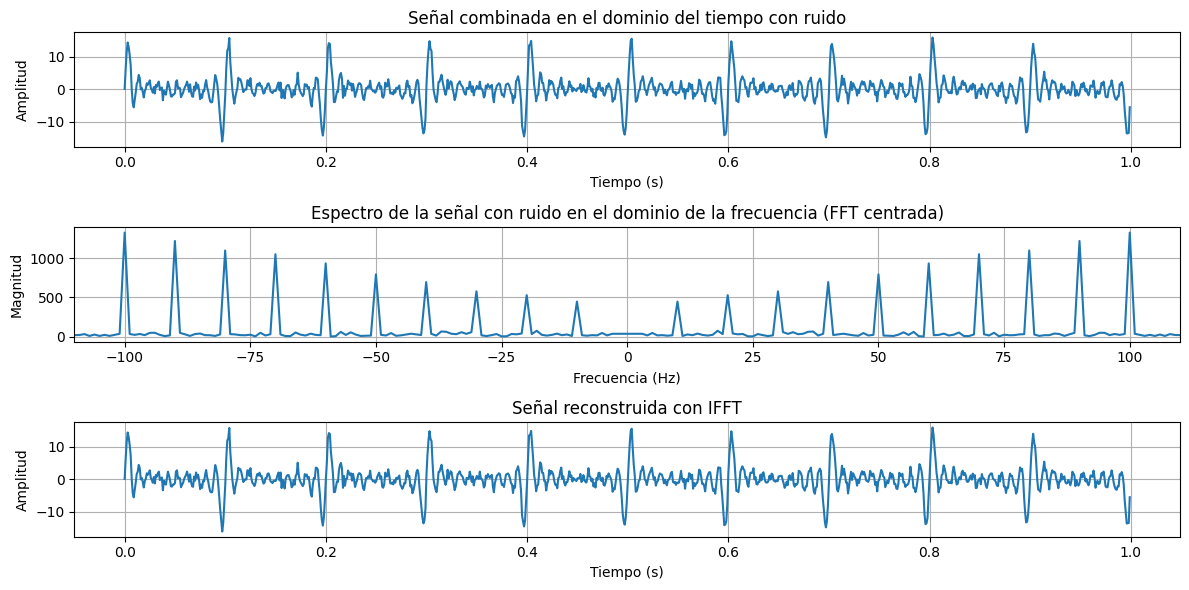

In [7]:
# FFT de la señal
fft_signal = np.fft.fft(signalnoise)
magnitude = np.abs(fft_signal)
freqs = np.fft.fftfreq(len(t), 1/fs)  # Frecuencias asociadas

# Centrado del espectro
fft_shifted = np.fft.fftshift(fft_signal)
freqs_shifted = np.fft.fftshift(freqs)
magnitude_shifted = np.abs(fft_shifted)


# Reconstrucción con IFFT
reconstructed_signal = np.fft.ifft(fft_signal).real  # Inversa de Fourier

# Graficar la señal en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signalnoise)
plt.title("Señal combinada en el dominio del tiempo con ruido")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar el espectro en el dominio de la frecuencia (centrado)
plt.subplot(3, 1, 2)
plt.plot(freqs_shifted, magnitude_shifted)
plt.title("Espectro de la señal con ruido en el dominio de la frecuencia (FFT centrada)")
plt.xlim(-110,110)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)

# Graficar el espectro en el dominio del tiempo
plt.subplot(3, 1, 3)
plt.plot(t, reconstructed_signal)
plt.title("Señal reconstruida con IFFT")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

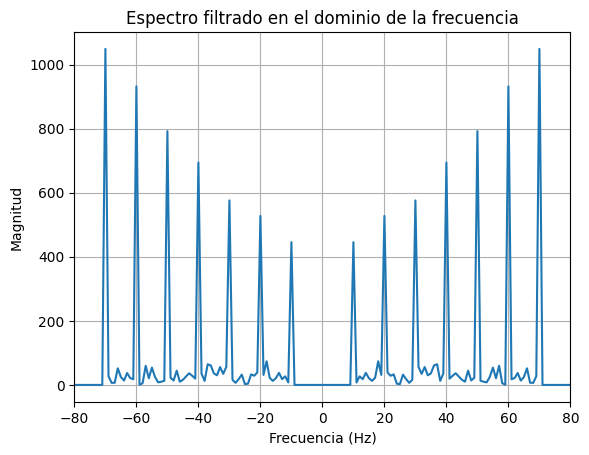

In [8]:
# FFT de la señal con ruido
fft_signal = np.fft.fft(reconstructed_signal)
frequencies = np.fft.fftfreq(len(t), d=1/fs)  # Frecuencias asociadas a la FFT

# Definir un rango de frecuencias que deseas conservar
low_cutoff = 10  # Frecuencia mínima (Hz)
high_cutoff = 70  # Frecuencia máxima (Hz)

# Crear una máscara: True para frecuencias dentro del rango, False fuera
mask = (frequencies >= low_cutoff) & (frequencies <= high_cutoff) | \
       (frequencies <= -low_cutoff) & (frequencies >= -high_cutoff)

# Aplicar la máscara: poner a cero las frecuencias fuera del rango
fft_signal_filtered = fft_signal * mask

# Visualizar el espectro filtrado
magnitude_filtered = np.abs(fft_signal_filtered)
plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(magnitude_filtered))
plt.title("Espectro filtrado en el dominio de la frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(-80,80)
plt.grid(True)
plt.show()


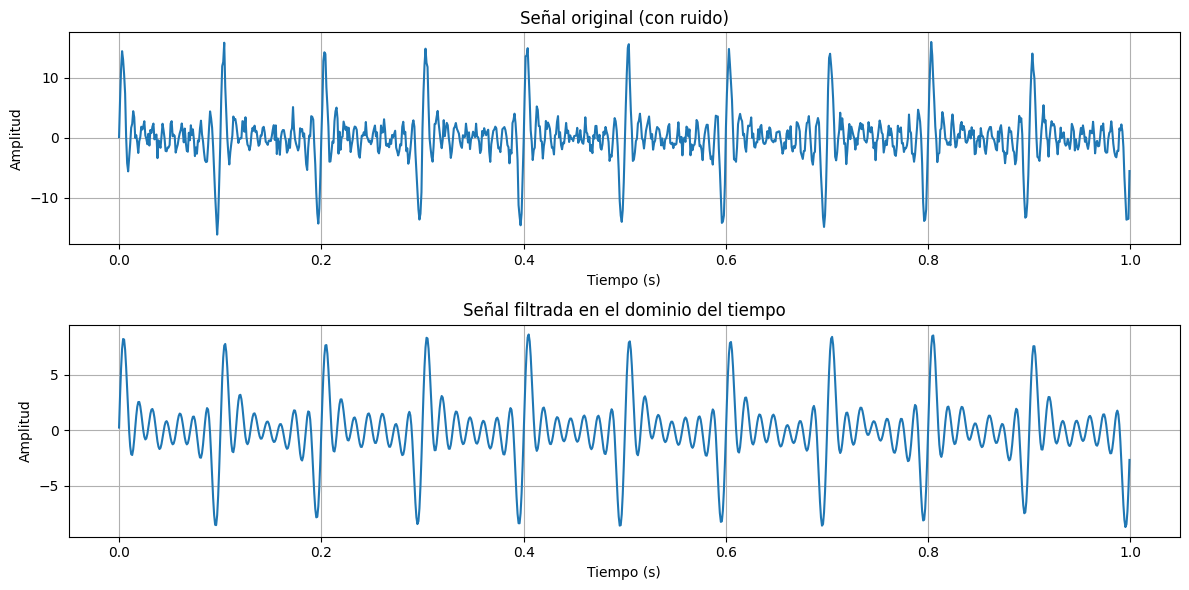

In [9]:
# Reconstruir la señal filtrada aplicando IFFT
signal_filtered = np.fft.ifft(fft_signal_filtered)

# Graficar la señal original vs la señal filtrada
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, reconstructed_signal)
plt.title("Señal original (con ruido)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, signal_filtered.real)
plt.title("Señal filtrada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()
